In [15]:
import ndjson as ndjson
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import ndjson


# General results of the experiments

In [16]:
dm = ['dijkstra_fees', 'dijkstra_probabilities', 'pickhardt_pay_fees', 'pickhardt_pay_probability', 'pickhardt_pay_probability_retained']

count  percentage
delivery_method                    success                            
dijkstra_fees                      delivery_failure   4680      0.4680
                                   no_path_found      3639      0.3639
                                   success            1681      0.1681
dijkstra_probabilities             success            4327      0.4327
                                   no_path_found      3639      0.3639
                                   delivery_failure   2034      0.2034
pickhardt_pay_fees                 delivery_failure   4384      0.4384
                                   no_path_found      3478      0.3478
                                   success            2138      0.2138
pickhardt_pay_probability          success            4939      0.4939
                                   no_path_found      3478      0.3478
                                   delivery_failure   1583      0.1583
pickhardt_pay_probability_retained success            5175      0.5175
                                   no_path_found      3948      0.3948
                                   delivery_failure    877      0.0877

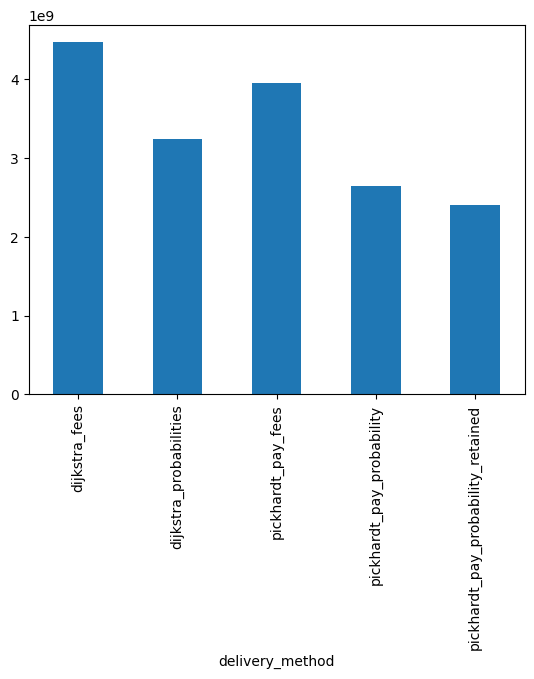

In [17]:
with open('data/all_results.ndjson') as f:
    payments = ndjson.load(f)

# create pandas dataframe from dictionary of dictionaries
df = pd.DataFrame(payments)
df.groupby("delivery_method")['residual_amount'].sum().plot(kind='bar')
s = df.groupby("delivery_method")[['residual_amount', 'amount']].sum()
s.applymap("{0:.0f}".format)
counts = df.groupby("delivery_method").success.value_counts()
percs = df.groupby("delivery_method").success.value_counts(normalize=True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

# No Path Found, Cut in the Network

In [32]:
with open('data/all_results.ndjson') as f:
    p = ndjson.load(f)
df = pd.DataFrame(p)
df = df.loc[df["delivery_method"] != "pickhardt_pay_probability_retained" ]

df = df[['delivery_method', 'success']]

df.loc[df["success"] == "success", "success"] = "path_found"
df.loc[df["success"] == "delivery_failure", "success"] = "path_found"
data = df

cross_tab_prop = pd.crosstab(index=data['delivery_method'],
                             columns=data['success'],
                             normalize="index")
cross_tab_prop

success,no_path_found,path_found
delivery_method,,
dijkstra_fees,0.3639,0.6361
dijkstra_probabilities,0.3639,0.6361
pickhardt_pay_fees,0.3478,0.6522
pickhardt_pay_probability,0.3478,0.6522


In [33]:
cross_tab = pd.crosstab(index=data['delivery_method'],
                        columns=data['success'])
cross_tab

success,no_path_found,path_found
delivery_method,,
dijkstra_fees,3639,6361
dijkstra_probabilities,3639,6361
pickhardt_pay_fees,3478,6522
pickhardt_pay_probability,3478,6522


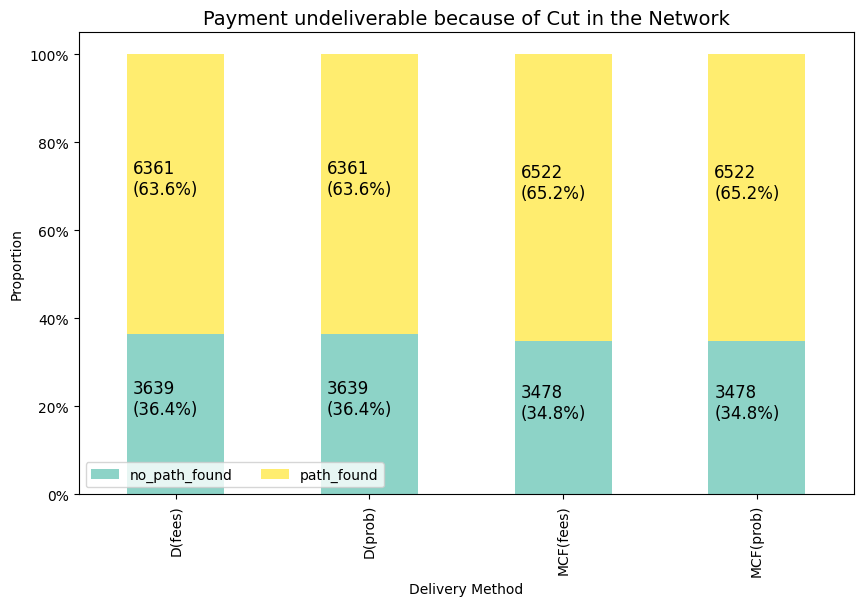

In [34]:
cross_tab_prop.plot(kind='bar',
                    stacked=True,
                    colormap='Set3',
                    figsize=(10, 6))

plt.title("Payment undeliverable because of Cut in the Network",fontsize=14)
plt.legend(loc="lower left", ncol=2)
plt.xlabel("Delivery Method")
plt.ylabel("Proportion")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
column_names = ["D(fees)", "D(prob)", "MCF(fees)", "MCF(prob)"]

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):

        plt.text(x=n - 0.22,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)',
                 color="black",
                 fontsize=12,
                 fontweight="normal")


plt.xticks(np.arange(4), column_names)

plt.show()

# Delivery Failure and Success

In [27]:
with open('data/all_results.ndjson') as f:
    p = ndjson.load(f)
df = pd.DataFrame(p)
df = df.loc[df["delivery_method"] != "pickhardt_pay_probability_retained" ]

df = df[['delivery_method', 'success']]

data = df[(df["success"] == "success") | (df["success"] == "delivery_failure")]

payment_success_prop = pd.crosstab(index=data['delivery_method'],
                             columns=data['success'],
                             normalize="index")
payment_success_prop

success,delivery_failure,success
delivery_method,,
dijkstra_fees,0.735733,0.264267
dijkstra_probabilities,0.319761,0.680239
pickhardt_pay_fees,0.672186,0.327814
pickhardt_pay_probability,0.242717,0.757283


In [28]:
payment_success = pd.crosstab(index=data['delivery_method'],
                             columns=data['success'])
payment_success

success,delivery_failure,success
delivery_method,,
dijkstra_fees,4680,1681
dijkstra_probabilities,2034,4327
pickhardt_pay_fees,4384,2138
pickhardt_pay_probability,1583,4939


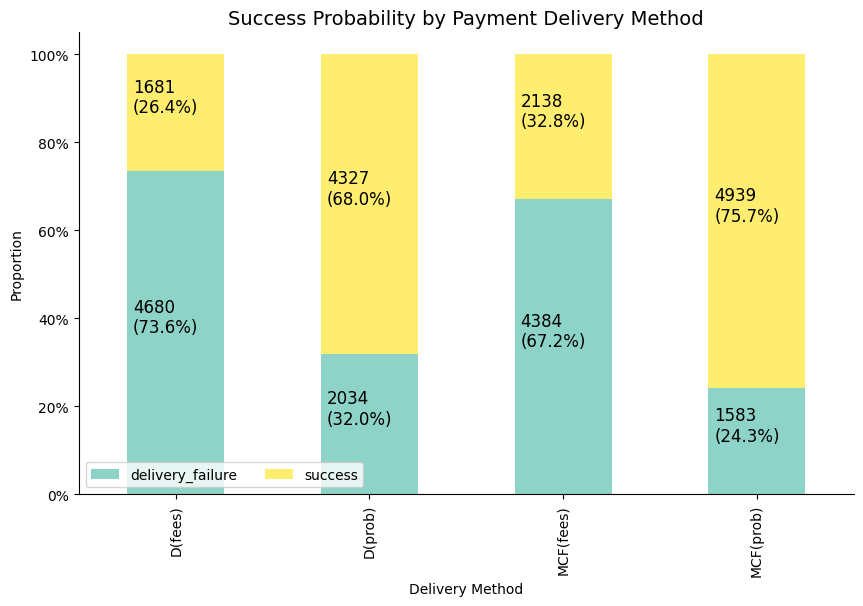

In [29]:
payment_success_prop.plot(kind='bar',
                    stacked=True,
                    colormap='Set3',
                    figsize=(10, 6))

plt.title("Success Probability by Payment Delivery Method",fontsize=14)
plt.legend(loc="lower left", ncol=2)
plt.xlabel("Delivery Method")
plt.ylabel("Proportion")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
column_names = ["D(fees)", "D(prob)", "MCF(fees)", "MCF(prob)"]


for n, x in enumerate([*payment_success.index.values]):
    for (proportion, count, y_loc) in zip(payment_success_prop.loc[x],
                                          payment_success.loc[x],
                                          payment_success_prop.loc[x].cumsum()):

        plt.text(x=n - 0.22,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)',
                 color="black",
                 fontsize=12,
                 fontweight="normal")


plt.xticks(np.arange(4), column_names)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

In [30]:
with open('data/all_results.ndjson') as f:
    p = ndjson.load(f)

# create pandas dataframe from dictionary of dictionaries
df = pd.DataFrame(p)

# data = data.loc[data['release_year'].isin([*range(2016, 2020)]), ['type', 'release_year']].copy()
# data = df.loc[df[['delivery_method', 'success']].copy()
df = df[['delivery_method', 'success']]
#data = df[(df["success"] == "no_path_found") | (df["success"] == "success")]

cross_tab_prop = pd.crosstab(index=df['delivery_method'],
                             columns=df['success'],
                             normalize="index")
cross_tab_prop

success,delivery_failure,no_path_found,success
delivery_method,,,
dijkstra_fees,0.4680,0.3639,0.1681
dijkstra_probabilities,0.2034,0.3639,0.4327
pickhardt_pay_fees,0.4384,0.3478,0.2138
pickhardt_pay_probability,0.1583,0.3478,0.4939
pickhardt_pay_probability_retained,0.0877,0.3948,0.5175


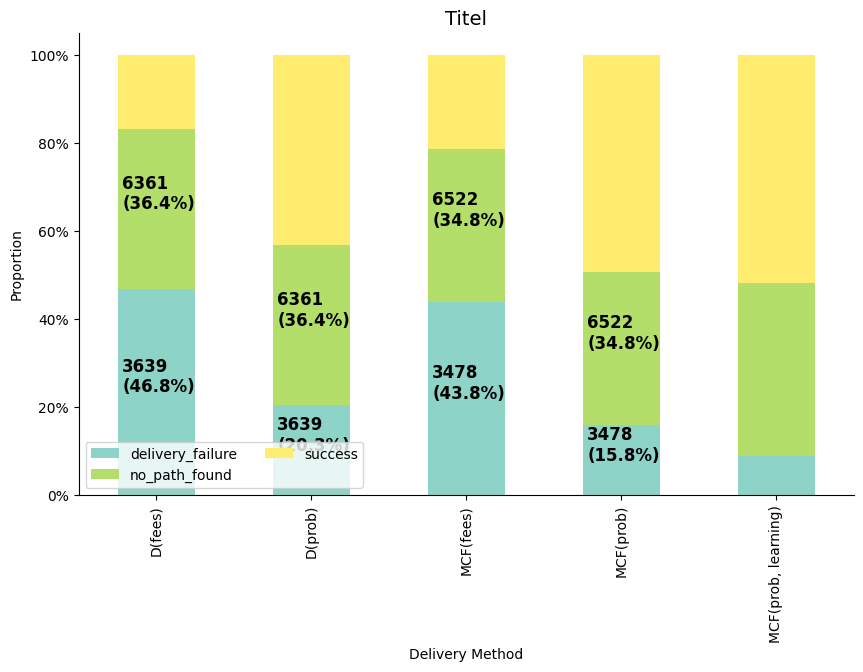

In [31]:
cross_tab_prop.plot(kind='bar',
                    stacked=True,
                    colormap='Set3',
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)

plt.title("Titel",fontsize=14)
plt.xlabel("Delivery Method")
plt.ylabel("Proportion")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
column_names = ["D(fees)", "D(prob)", "MCF(fees)", "MCF(prob)", "MCF(prob, learning)"]


for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):

        plt.text(x=n - 0.22,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)',
                 color="black",
                 fontsize=12,
                 fontweight="bold")


plt.xticks(np.arange(5), column_names)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

# Experiment 6

In [12]:
df = pd.DataFrame({'amount in mio sats': [10148, 10148, 2631],
                   'flows': [33235, 7065, 4241]})

In [13]:
print(df)

   amount in mio sats  flows
0               10148  33235
1               10148   7065
2                2631   4241


TypeError: cannot unpack non-iterable AxesSubplot object

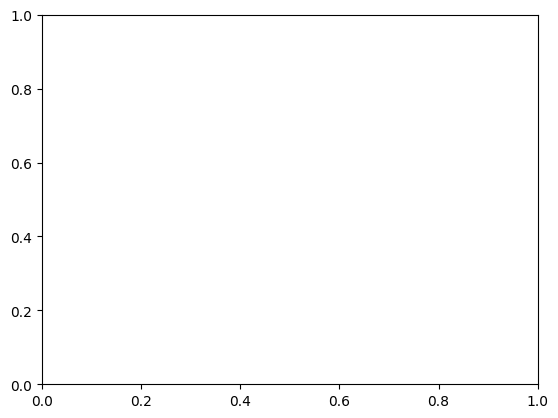

In [14]:
labels = ['start', 'collapsing', 'netting']
amount = [10148, 10148, 2631]
flows = [33235, 7065, 4241]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, (ax, ax2) = plt.subplots()

#rects1 = ax.bar(x - width/2, flows, width, label='amount in mio sats', color="blue")
l1 = ax.bar(x - width/2, flows, width, label='amount in mio sats', color="blue")
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('amount', color="blue")
ax.set_title('Flows and Amount Sent')
ax.set_xticks(x, labels)

ax2=ax.twinx()
ax2.set_xticks(x, labels)
#rects2 = ax2.bar(x + width/2, amount, width, label='used edges/flow', color="orange")
l2 = ax2.bar(x + width/2, amount, width, label='used edges/flow', color="orange")
ax2.set_ylabel("used edges/flow", color="orange")


ax.bar_label(rects1, padding=3, color="blue")
ax2.bar_label(rects2, padding=3, color="orange")
ax.legend(loc=0)
ax2.legend(loc=0)
#fig.tight_layout()
ax2.legend([l1, l2], ['Sine (left)', 'Straight (right)'])

plt.show()

In [ ]:
from matplotlib.ticker import StrMethodFormatter

labels = ['start', 'collapsing', 'netting']
amount = [10148, 10148, 2631]
flows = [33235, 7065, 4241]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax1 = plt.subplots(figsize=(10, 6), layout='constrained')

plt.ylim(0, 20000)


ax1.set_title('Flows and Amount Sent', fontsize=18)

l1 = ax1.bar(x - width/2, amount, width, label='amount in mio sats', color="blue")
ax1.set_xticks(x, labels, fontsize=16)
ax1.set_yticklabels(['{:,.0f}'.format(x) for x in ax1.get_yticks()])
ax1.xaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
ax2 = ax1.twinx()
l2 = ax2.bar(x + width/2, flows, width, label='used edges/flow', color="orange")
ax2.set_xticks(x, labels)
ax2.set_yticklabels(['{:,.0f}'.format(x) for x in ax2.get_yticks()])
ax2.legend([l1, l2], ['amount in mio sats', 'number of used edges/flow'], fontsize=16)
ax1.set_ylabel('amount', fontsize=16)
ax1.bar_label(l1, padding=3, fontsize=16)
ax2.set_ylabel("used edges/flow", fontsize=16)
ax2.bar_label(l2, padding=3, fontsize=16)



In [ ]:
df.plot(kind='bar',
                    stacked=False,
                    colormap='Set3',
                    figsize=(10, 6))

# Drain over Time

In [ ]:
with open('data/all_results.ndjson') as f:
    dfpayments = ndjson.load(f)
df = pd.DataFrame(p)
method = 0
df = df.loc[(df["delivery_method"] == dm[method])]

i = 0
for i in range(0, 4):
    print(df.iloc[(i * 2500):((i+1) * 2500)]["residual_amount"].sum())


In [21]:
import math
#-math.log(1 - amt / edge[3].capacity)
#-math.log(1 - 60000 / 100000)
math.exp(0.9788099598238682)

2.6612873179014147